   Id  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt  FullBath  \
0   1            7       1560           0         1658       1969         2   
1   2            4       2827           2         1319       2012         3   
2   3            8       3920           0          841       2010         1   
3   4            5       3044           0         1058       1998         0   
4   5            7        801           1         2428       2020         0   

   BedroomAbvGr  LotArea  SalePrice  
0             1     8059     177106  
1             4    13530     301044  
2             4     9010     360609  
3             4    13207     240556  
4             1     9117     193656  
               Id  OverallQual    GrLivArea  GarageCars  TotalBsmtSF  \
count  300.000000   300.000000   300.000000  300.000000   300.000000   
mean   150.500000     5.326667  2307.386667    1.330000  1468.796667   
std     86.746758     2.873001  1042.561303    1.109898   672.333705   
min      

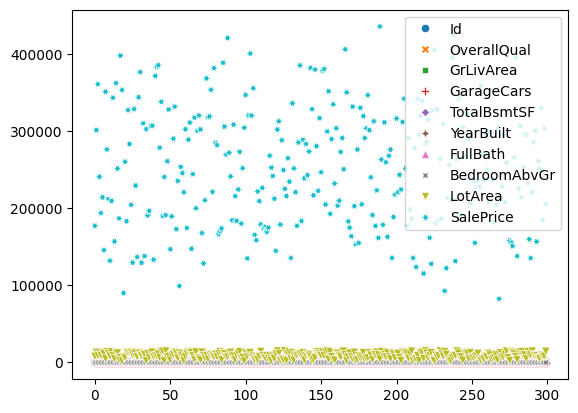

                    Id  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  \
Id            1.000000    -0.158700   0.050807   -0.008250    -0.024281   
OverallQual  -0.158700     1.000000  -0.116413   -0.017138     0.008098   
GrLivArea     0.050807    -0.116413   1.000000    0.056380     0.023471   
GarageCars   -0.008250    -0.017138   0.056380    1.000000     0.051605   
TotalBsmtSF  -0.024281     0.008098   0.023471    0.051605     1.000000   
YearBuilt     0.037105     0.005990   0.032073   -0.031599    -0.050187   
FullBath      0.064142    -0.047619   0.103215    0.125668     0.042792   
BedroomAbvGr -0.006326    -0.056594  -0.090480    0.083287    -0.039197   
LotArea      -0.060973    -0.030605  -0.035433   -0.005316    -0.007753   
SalePrice    -0.025416     0.352899   0.745095    0.351321     0.250178   

              YearBuilt  FullBath  BedroomAbvGr   LotArea  SalePrice  
Id             0.037105  0.064142     -0.006326 -0.060973  -0.025416  
OverallQual    0.005990 -0.04761

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")

print(df.head())
print(df.describe())
print(df.isnull().sum())

sns.scatterplot(data=df)
plt.show()

print(df.corr())


In [7]:
print(df.columns)


Index(['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'YearBuilt', 'FullBath', 'BedroomAbvGr', 'LotArea', 'SalePrice'],
      dtype='object')


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("data.csv")

# Feature selection
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
        'YearBuilt', 'FullBath', 'BedroomAbvGr', 'LotArea']]
y = df['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)

# Coefficients for each feature
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coeff_df)


Mean Squared Error: 156386511.419058
R² Score: 0.9724369952260797
Intercept: -1512820.5684315367
        Feature   Coefficient
0   OverallQual  11914.688135
1     GrLivArea     55.410257
2    GarageCars  19109.641614
3   TotalBsmtSF     25.199018
4     YearBuilt    746.370978
5      FullBath  11040.343046
6  BedroomAbvGr   4812.061994
7       LotArea     -0.159522


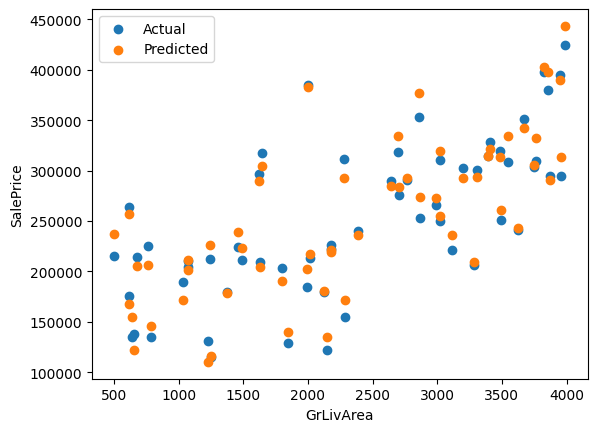

In [11]:
plt.scatter(X_test['GrLivArea'], y_test, label='Actual')
plt.scatter(X_test['GrLivArea'], y_pred, label='Predicted')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()


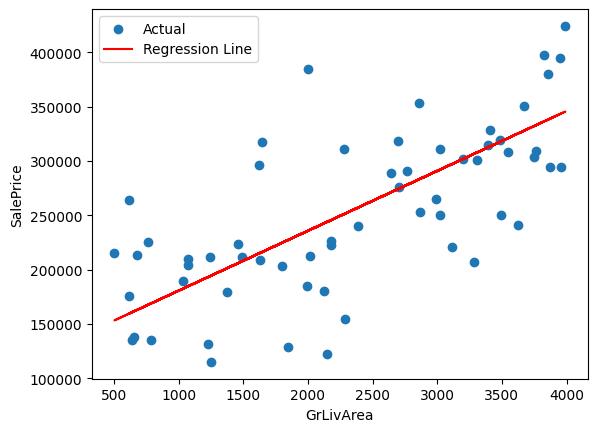

In [12]:
X = df[['GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()
